In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import axes
from PIL import Image
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
from skimage.color import rgb2hsv
from skimage.morphology import convex_hull_image

In [ ]:
def maxmod(p,th=5000):
  for i in range(len(p[0][:])):
    if p[0][-i]>th:
      max=p[1][-i]
      break
  return max
def cmask(mask):
  sel=0
  for i in mask.ravel():
    if i:
      sel=sel+1
  return sel
def ucut(img,f):
  cx=int(img.shape[0]/(f*2))
  cy=int(img.shape[1]/(f*2))
  return img[cx:(img.shape[0]-cx),cy:(img.shape[1]-cy)]

def Assem(img,cimg,f):
  m=np.full(img.shape, False)
  cx=int(img.shape[0]/(f*2))
  cy=int(img.shape[1]/(f*2))
  print(cimg.shape)
  print(m[cx:cx+cimg.shape[0],cy:cy+cimg.shape[1]].shape)
  m[cx:cx+cimg.shape[0],cy:cy+cimg.shape[1]]=cimg
  return m

In [ ]:
def adapth(img,ith=0.8,f=3,maxiter=25,coe=0.035,step=0.01,w=0.04):

  hsv_i= rgb2hsv(img)
  med = cv2.blur(hsv_i,(25,25),0)
  val_img = med[:, :, 2]
  binary_img = np.logical_and((val_img > ith),((ith+w) > val_img))
  con=convex_hull_image(binary_img)

  print(ith)
  print(cmask(con)/(len(con.ravel())))
  if (cmask(con)/(len(con.ravel())))>coe:
    for i in range(maxiter):
      ith=ith+step
      print(ith)
      binary_img=np.logical_and((val_img > ith),((ith+w) > val_img))
      con=convex_hull_image(binary_img)
      print(cmask(con)/(len(con.ravel())))
      if ((cmask(con)/(len(con.ravel())))<coe)or(ith>=1):
        break
  return ith

In [ ]:
def cadapth(img,ith=0.8,f=3,maxiter=25,coe=0.035,step=0.01,w=0.04):

  hsv_i= rgb2hsv(img)
  med = cv2.blur(hsv_i,(25,25),0)
  val_img = med[:, :, 2]
  cimg=ucut(val_img,3)
  binary_img = np.logical_and((cimg > ith),((ith+w) > cimg))

  m=Assem(val_img,binary_img,3)
  con=convex_hull_image(m)

  print(ith)
  print(cmask(con)/(len(con.ravel())))
  if (cmask(con)/(len(con.ravel())))>coe:
    for i in range(maxiter):
      ith=ith+step
      print(ith)
      binary_img=np.logical_and((cimg > ith),((ith+w) > cimg))
      con=convex_hull_image(binary_img)
      print(cmask(con)/(len(val_img.ravel())))
      if ((cmask(con)/(len(val_img.ravel())))<coe)or(ith>=1):
        break
  return ith

In [ ]:
di='/content/drive/My Drive/CoLab/Pre-pro/c1anemia-121.jpg'
img = io.imread(di)
 
fig, ax0 = plt.subplots(ncols=1, figsize=(16, 4))
ax0.imshow(img)
plt.tight_layout()
plt.show()
 
hsv_i= rgb2hsv(img)
med = cv2.blur(hsv_i,(25,25),0)
hue_img = med[:, :, 0]
sat_img = med[:, :, 1]
val_img = med[:, :, 2]
 
#Threshold
th=maxmod(ax0.hist(val_img.ravel(), 512),4000)


binary_img = val_img > th
 
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 4))
 
ax0.hist(val_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=th, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 1)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')
 
plt.tight_layout()
plt.show()
 
con=convex_hull_image(binary_img)
fig, ax1 = plt.subplots(ncols=1, figsize=(16, 4))
ax1.imshow(con,cmap=plt.cm.gray)
plt.tight_layout()
plt.show()
#recorte adaptativo
#menor que adaptativo

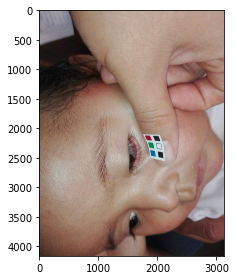

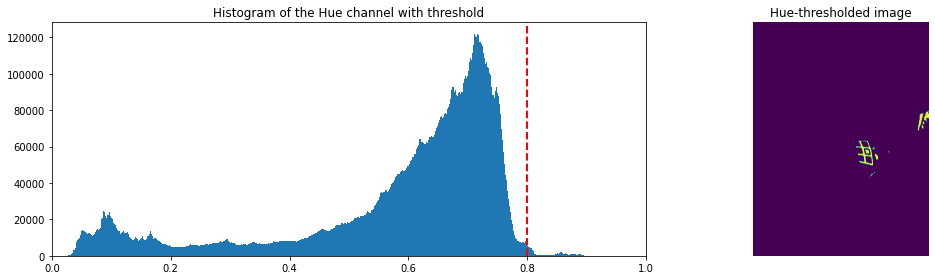

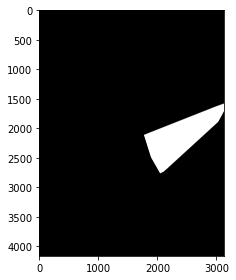

0.05062931459566075

In [ ]:
di='/content/drive/My Drive/CoLab/Pre-pro/c1anemia-100.jpg'
img = io.imread(di)
 
fig, ax0 = plt.subplots(ncols=1, figsize=(16, 4))
ax0.imshow(img)
plt.tight_layout()
plt.show()
 
hsv_i= rgb2hsv(img)
med = cv2.blur(hsv_i,(25,25),0)
hue_img = med[:, :, 0]
sat_img = med[:, :, 1]
val_img = med[:, :, 2]
 
#Threshold
th=0.8

binary_img = val_img > th
 
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 4))
 
ax0.hist(val_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=th, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 1)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')
 
plt.tight_layout()
plt.show()
 
con=convex_hull_image(binary_img)
fig, ax1 = plt.subplots(ncols=1, figsize=(16, 4))
ax1.imshow(con,cmap=plt.cm.gray)
plt.tight_layout()
plt.show()
cmask(con)/(len(con.ravel()))

#recorte adaptativo
#menor que adaptativo

In [ ]:
ith=cadapth(img,maxiter=1000,coe=0.01,step=0.001)

In [ ]:
fig, ax0 = plt.subplots(ncols=1, figsize=(16, 4))
ax0.imshow(img)
plt.tight_layout()
plt.show()
 
hsv_i= rgb2hsv(img)
med = cv2.blur(hsv_i,(25,25),0)
hue_img = med[:, :, 0]
sat_img = med[:, :, 1]
val_img = med[:, :, 2]
val_img=ucut(val_img,3)
 
#Threshold
th=0.84
binary_img = np.logical_and((val_img > ith),((ith+0.03) > val_img))

 
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 4))
 
ax0.hist(val_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=ith, color='r', linestyle='dashed', linewidth=2)
ax0.axvline(x=ith+0.03, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 1)
#ax0.set_ybound(0, 10)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')
 
plt.tight_layout()
plt.show()
 
con=convex_hull_image(binary_img)
fig, ax1 = plt.subplots(ncols=1, figsize=(16, 4))
ax1.imshow(con,cmap=plt.cm.gray)
plt.tight_layout()
plt.show()

In [ ]:
m=np.full(val_img.shape, False)
m

In [ ]:
b=np.full((2,2),True)
b
m[1:1+b.shape[0],1:1+b.shape[1]]=b
m